## Semantic segmentation ##


1. Follow the tutorial at https://github.com/divamgupta/image-segmentation-keras which includes colab work sheet (https://colab.research.google.com/drive/1q_eCYEzKxixpCKH1YDsLnsvgxl92ORcv?usp=sharing). Try the given example.

2. The github repository contains implementations for various semantic segmentation frameworks. Modify the code to use fully convolutional network (fcn_32 defined in keras_segmentation.models.fcn). Compare the results.

## Class Activity Mapping ##

1. Following the tutorial for tf-keras-vis, visualise CAM for the Fashion MNIST model from the last lecture.  https://github.com/keisen/tf-keras-vis/blob/master/docs/examples/attentions.ipynb.

In [ ]:
# We use Fashion MNIST dataset, which is provided by Keras
# The following is the code to load data etc. same as last session

# import Keras & Tensorflow
import tensorflow as tf
from tensorflow import keras

# Load image data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Data preparation:
#   Map intensities from [0--255] to 0.0--1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
# reshape: map data to 4D, with the last dimension of 1 channel (grayscale)
history = model.fit(x_train.reshape((x_train.shape[0], 28, 28, 1)), y_train, epochs = 60, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(x_test.reshape(x_test.shape[0], 28, 28, 1), y_test)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/60
1688/1688 [==============================] - 12s 7ms/step - loss: 1.8318 - accuracy: 0.3220 - val_loss: 0.6854 - val_accuracy: 0.7408
Epoch 2/60
1688/1688 [==============================] - 11s 6ms/step - loss: 0.8508 - accuracy: 0.6859 - val_loss: 0.5368 - val_accuracy: 0.7907
Epoch 3/60
1688/1688 [==============================] - 11s 6ms/step - loss: 0.6659 - accuracy: 0.7533 - val_loss: 0.4672 - val_accuracy: 0.8232
Epoch 4/60
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5861 - accuracy: 0.7889 - val_loss: 0.4420 - val_accuracy: 0.8362
Epoch 5/60
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5378 - accuracy: 0.8078 - val_loss: 0.4081 - val_accuracy: 0.8492
Epoch 6/60
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4974 - accuracy: 0.8243 - val_loss: 0.3943 - val_accuracy: 0.8537
Epoch 7/60
1688/1688 [==============================] - 11s 6ms/ste

[0.2816052734851837, 0.911300003528595]

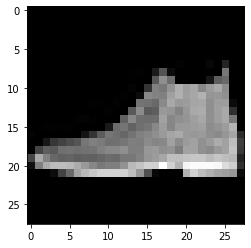

9


In [ ]:
# Take the first test as an example
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_test[0, ], cmap = 'gray')
plt.show()
print(y_test[0])

In [ ]:
# install/upgrade packages
!pip install --upgrade tf-keras-vis tensorflow matplotlib